# Deep Learning with Python
Performing Deep Learning on the Bike Sharing Dataset

## Initializations

### Defining CONSTANTS

In [1]:
EPOCHS = 200
LAYERS = 5
NEURONS = 256

# Here the test split is 10% of the data, and the validation split is 10% of the remaining training data
TEST_SPLIT = 0.15
VAL_SPLIT = 0.20

import datetime
LOG_NAME = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

#### Importing required Libraries

In [2]:
# supporting libraries
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [3]:
# deep learning libraries and modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Data Loading, Cleaning, and Preparation


In [4]:
os.chdir(r"C:\Users\sgoswam\Desktop\Workspaces\OR568-FinalTeamProject\analysis\DeepLearning\Python")

In [5]:
df = pd.read_csv(
    "data/SeoulBikeData.csv",
    encoding_errors='ignore',
    header = 0,
    names = [
        'Date', 'RentedBikeCount', 'Hour', 'Temperature', 'Humidity',
        'Windspeed', 'Visibility', 'DewPointTemperature', 'SolarRadiation',
        'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'FunctionalDay'
    ],
    dtype={
        'Date': 'str',
        'RentedBikeCount': 'int',
        'Hour': 'int',
        'Temperature': 'float',
        'Humidity': 'int',
        'Windspeed': 'float',
        'Visibility': 'int',
        'DewPointTemperature': 'float',
        'SolarRadiation': 'float',
        'Rainfall': 'float',
        'Snowfall': 'float',
        'Seasons': 'str',
        'Holiday': 'str',
        'FunctionalDay': 'str'
    }
)
df.head()

,Date,RentedBikeCount,Hour,Temperature,Humidity,Windspeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,Seasons,Holiday,FunctionalDay
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# Checking for null values
print("Null Value columns in the dataset: ")
df.isnull().sum()

Null Value columns in the dataset: 


Date                   0
RentedBikeCount        0
Hour                   0
Temperature            0
Humidity               0
Windspeed              0
Visibility             0
DewPointTemperature    0
SolarRadiation         0
Rainfall               0
Snowfall               0
Seasons                0
Holiday                0
FunctionalDay          0
dtype: int64

No null values were observed in the datset.

In [7]:
# Converting the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')

In [8]:
df['DayMonth'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month_name()
# df['Year'] = df['Date'].dt.year       # Not using year as a feature, since we don't have enough data for multiple years
df['DayWeek'] = df['Date'].dt.day_name()
df['DayYear'] = df['Date'].dt.dayofyear

In [9]:
df.head()

,Date,RentedBikeCount,Hour,Temperature,Humidity,Windspeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,Seasons,Holiday,FunctionalDay,DayMonth,Month,DayWeek,DayYear
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,December,Friday,335
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,December,Friday,335
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,December,Friday,335
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,December,Friday,335
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,December,Friday,335


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 8760 non-null   datetime64[ns]
 1   RentedBikeCount      8760 non-null   int32         
 2   Hour                 8760 non-null   int32         
 3   Temperature          8760 non-null   float64       
 4   Humidity             8760 non-null   int32         
 5   Windspeed            8760 non-null   float64       
 6   Visibility           8760 non-null   int32         
 7   DewPointTemperature  8760 non-null   float64       
 8   SolarRadiation       8760 non-null   float64       
 9   Rainfall             8760 non-null   float64       
 10  Snowfall             8760 non-null   float64       
 11  Seasons              8760 non-null   object        
 12  Holiday              8760 non-null   object        
 13  FunctionalDay        8760 non-nul

In [11]:
df.describe()

,RentedBikeCount,Hour,Temperature,Humidity,Windspeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,DayMonth,DayYear
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,15.720548,183.000000
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,8.796749,105.372043
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,8.000000,92.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,16.000000,183.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,23.000000,274.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,31.000000,365.000000


### Preprocessing the data
Change this list to assign the column encoding type.

In [12]:
# Creating a list of features to be used in the model
target = ['RentedBikeCount']
binary_features = ['Holiday', 'FunctionalDay']
numeric_features = [
    'Hour', 'Temperature', 'Humidity', 'Windspeed',
    'Visibility', 'DewPointTemperature', 'SolarRadiation',
    'Rainfall', 'Snowfall', 'DayMonth', 'DayYear'
]
categorical_features = ['Seasons', 'Month', 'DayWeek']
features = binary_features + numeric_features + categorical_features

In [13]:
# Standardizing the numeric features using sklearn's StandardScaler
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [14]:
# Encoding the Binary features using sklearn's OneHotEncoder

ohe_encoder = make_column_transformer(
    (OneHotEncoder(), binary_features), remainder = 'passthrough'
)

# encoding categorical data into sparse matrix, and storing it as dataframe
transformed = ohe_encoder.fit_transform(df[binary_features])
df_ohe = pd.DataFrame(transformed, columns=ohe_encoder.get_feature_names_out() )
ohe_binary_features = df_ohe.columns.tolist()
df[ohe_binary_features] = df_ohe
df

,Date,RentedBikeCount,Hour,Temperature,Humidity,Windspeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,...,Holiday,FunctionalDay,DayMonth,Month,DayWeek,DayYear,onehotencoder__Holiday_Holiday,onehotencoder__Holiday_No Holiday,onehotencoder__FunctionalDay_No,onehotencoder__FunctionalDay_Yes
0,2017-12-01,254,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,...,No Holiday,Yes,-1.673503,December,Friday,1.442590,0.0,1.0,0.0,1.0
1,2017-12-01,204,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,...,No Holiday,Yes,-1.673503,December,Friday,1.442590,0.0,1.0,0.0,1.0
2,2017-12-01,173,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,...,No Holiday,Yes,-1.673503,December,Friday,1.442590,0.0,1.0,0.0,1.0
3,2017-12-01,107,-1.227936,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,...,No Holiday,Yes,-1.673503,December,Friday,1.442590,0.0,1.0,0.0,1.0
4,2017-12-01,78,-1.083473,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,...,No Holiday,Yes,-1.673503,December,Friday,1.442590,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,1.083473,-0.726961,-1.189822,0.844486,0.751605,-1.100630,-0.655132,-0.1318,...,No Holiday,Yes,1.623357,November,Friday,1.433099,0.0,1.0,0.0,1.0
8756,2018-11-30,764,1.227936,-0.793939,-1.042483,0.554978,0.925871,-1.070001,-0.655132,-0.1318,...,No Holiday,Yes,1.623357,November,Friday,1.433099,0.0,1.0,0.0,1.0
8757,2018-11-30,694,1.372399,-0.860918,-0.944257,-1.375075,0.873263,-1.070001,-0.655132,-0.1318,...,No Holiday,Yes,1.623357,November,Friday,1.433099,0.0,1.0,0.0,1.0
8758,2018-11-30,712,1.516862,-0.902779,-0.846031,-0.699556,0.694064,-1.062344,-0.655132,-0.1318,...,No Holiday,Yes,1.623357,November,Friday,1.433099,0.0,1.0,0.0,1.0


In [15]:
# Encoding the Categorical features using sklearn's OneHotEncoder
ohe_encoder = make_column_transformer(
    (OneHotEncoder(), categorical_features), remainder = 'passthrough'
)

# encoding categorical data into sparse matrix, and storing it as dataframe
transformed = ohe_encoder.fit_transform(df[categorical_features])
df_ohe = pd.DataFrame(transformed.toarray(), columns=ohe_encoder.get_feature_names_out() )
ohe_categorical_features = df_ohe.columns.tolist()
df[ohe_categorical_features] = df_ohe
df

,Date,RentedBikeCount,Hour,Temperature,Humidity,Windspeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,...,onehotencoder__Month_November,onehotencoder__Month_October,onehotencoder__Month_September,onehotencoder__DayWeek_Friday,onehotencoder__DayWeek_Monday,onehotencoder__DayWeek_Saturday,onehotencoder__DayWeek_Sunday,onehotencoder__DayWeek_Thursday,onehotencoder__DayWeek_Tuesday,onehotencoder__DayWeek_Wednesday
0,2017-12-01,254,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-12-01,204,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-12-01,173,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-12-01,107,-1.227936,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017-12-01,78,-1.083473,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,1.083473,-0.726961,-1.189822,0.844486,0.751605,-1.100630,-0.655132,-0.1318,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8756,2018-11-30,764,1.227936,-0.793939,-1.042483,0.554978,0.925871,-1.070001,-0.655132,-0.1318,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8757,2018-11-30,694,1.372399,-0.860918,-0.944257,-1.375075,0.873263,-1.070001,-0.655132,-0.1318,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8758,2018-11-30,712,1.516862,-0.902779,-0.846031,-0.699556,0.694064,-1.062344,-0.655132,-0.1318,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
encoded_features = ohe_binary_features + numeric_features + ohe_categorical_features
df[encoded_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   onehotencoder__Holiday_Holiday     8760 non-null   float64
 1   onehotencoder__Holiday_No Holiday  8760 non-null   float64
 2   onehotencoder__FunctionalDay_No    8760 non-null   float64
 3   onehotencoder__FunctionalDay_Yes   8760 non-null   float64
 4   Hour                               8760 non-null   float64
 5   Temperature                        8760 non-null   float64
 6   Humidity                           8760 non-null   float64
 7   Windspeed                          8760 non-null   float64
 8   Visibility                         8760 non-null   float64
 9   DewPointTemperature                8760 non-null   float64
 10  SolarRadiation                     8760 non-null   float64
 11  Rainfall                           8760 non-null   float

In [17]:
df[encoded_features + target] = df[encoded_features + target].astype('float64')

### Splitting the dataset into train, validation, and test sets

In [18]:
train_df, test_df = train_test_split(
    df[encoded_features + target], test_size=TEST_SPLIT,
    random_state=42, shuffle=True
)
train_df, val_df = train_test_split(
    train_df, test_size=VAL_SPLIT,
    random_state=42, shuffle=True
)
len(train_df), len(val_df), len(test_df)

(5956, 1490, 1314)

# Assembling the model

In [19]:
train_ds = tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(train_df[encoded_features].values, tf.float64),
            tf.cast(train_df[target].values, tf.int32)
        )
    )

val_ds = tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(val_df[encoded_features].values, tf.float64),
            tf.cast(val_df[target].values, tf.int32)
        )
    )

test_ds = tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(test_df[encoded_features].values, tf.float64),
            tf.cast(test_df[target].values, tf.int32)
        )
    )

# Assembling the model

In [20]:
model = Sequential()

for i in range(LAYERS):
    model.add(Dense(NEURONS, activation='relu'))

model.add(Dense(1))


model.build(input_shape=(None, len(encoded_features)))

model.compile(
    optimizer   = 'adam',
    loss        = tf.keras.losses.MeanSquaredError(),
    metrics     = [tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.RootMeanSquaredError()]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               9984      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 273,409
Trainable params: 273,409
Non-trai

In [21]:
os.mkdir(os.path.join('logs', LOG_NAME))

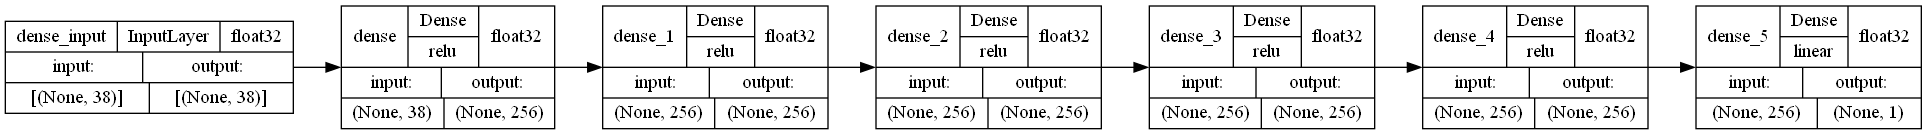

In [22]:
tf.keras.utils.plot_model(
    model,
    to_file                     = os.path.join('logs', LOG_NAME, f'model_{LOG_NAME}.png'),
    rankdir                     = "LR",
    show_shapes                 = True,
    show_dtype                  = True,
    show_layer_names            = True,
    show_layer_activations      = True
)

# Training the model

In [23]:
history = model.fit(
    train_df[encoded_features].values,
    train_df[target].values,
    validation_data = (val_df[encoded_features].values, val_df[target].values),
    epochs=EPOCHS
)

Epoch 1/200
187/187 [==============================] - 2s 6ms/step - loss: 256220.8438 - mean_absolute_error: 340.6927 - mean_squared_error: 256220.8438 - root_mean_squared_error: 506.1826 - val_loss: 126931.1562 - val_mean_absolute_error: 246.8052 - val_mean_squared_error: 126931.1562 - val_root_mean_squared_error: 356.2740
Epoch 2/200
187/187 [==============================] - 1s 4ms/step - loss: 108895.2188 - mean_absolute_error: 225.2960 - mean_squared_error: 108895.2188 - root_mean_squared_error: 329.9928 - val_loss: 106409.5859 - val_mean_absolute_error: 213.9370 - val_mean_squared_error: 106409.5859 - val_root_mean_squared_error: 326.2048
Epoch 3/200
187/187 [==============================] - 1s 4ms/step - loss: 95810.7578 - mean_absolute_error: 209.1551 - mean_squared_error: 95810.7578 - root_mean_squared_error: 309.5331 - val_loss: 93571.6641 - val_mean_absolute_error: 205.5475 - val_mean_squared_error: 93571.6641 - val_root_mean_squared_error: 305.8949
Epoch 4/200
187/187 [==

# .

In [24]:
model.save(os.path.join('logs', LOG_NAME, f'model_{LOG_NAME}.h5'))

In [25]:
hist_df = pd.DataFrame(history.history)
hist_df.to_csv(os.path.join('logs', LOG_NAME, f"training_loss_{LOG_NAME}.csv"))
hist_df

,loss,mean_absolute_error,mean_squared_error,root_mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,val_root_mean_squared_error
0,256220.843750,340.692657,256220.843750,506.182617,126931.156250,246.805222,126931.156250,356.273987
1,108895.218750,225.296021,108895.218750,329.992767,106409.585938,213.936951,106409.585938,326.204834
2,95810.757812,209.155060,95810.757812,309.533142,93571.664062,205.547455,93571.664062,305.894867
3,90895.664062,204.050522,90895.664062,301.489075,85084.195312,190.579422,85084.195312,291.691956
4,80518.390625,189.236008,80518.390625,283.757629,84852.507812,194.747192,84852.507812,291.294525
...,...,...,...,...,...,...,...,...
195,763.684692,18.430872,763.684692,27.634846,23341.978516,83.714256,23341.978516,152.780823
196,1048.241089,21.061216,1048.241089,32.376553,23669.570312,84.149345,23669.570312,153.849182
197,1173.073975,22.557840,1173.073975,34.250168,23046.443359,83.481239,23046.443359,151.810547
198,1341.982666,23.908989,1341.982666,36.633083,23252.962891,83.922485,23252.962891,152.489227


### Evaluating the model

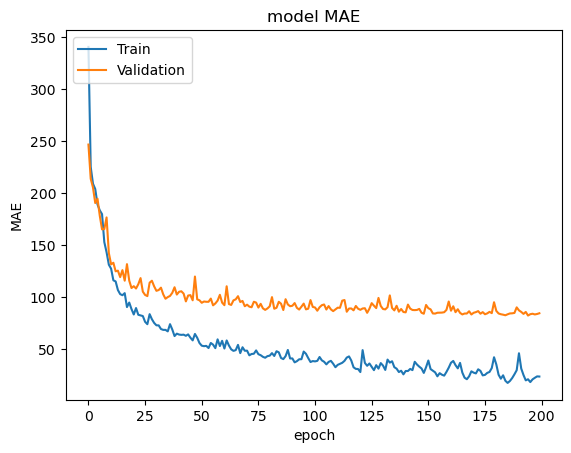

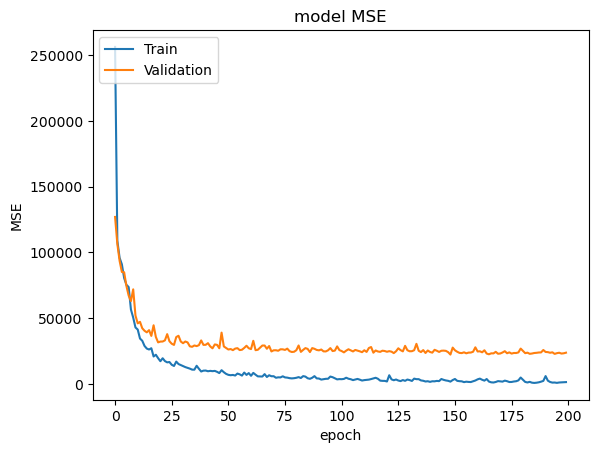

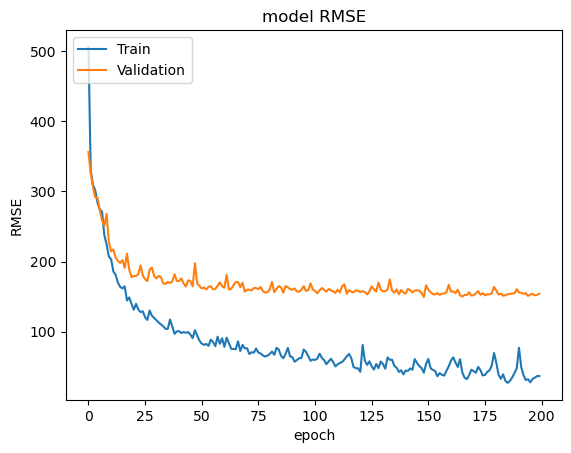

In [26]:
# summarize history for MAE
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig(os.path.join('logs', LOG_NAME, f"model_MAE_{LOG_NAME}.png"))
plt.show()

# summarize history for MSE
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig(os.path.join('logs', LOG_NAME, f"model_MSE_{LOG_NAME}.png"))
plt.show()



# summarize history for RMSE
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model RMSE')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig(os.path.join('logs', LOG_NAME, f"model_RMSE_{LOG_NAME}.png"))
plt.show()

In [27]:
result = model.evaluate(test_df[encoded_features].values, test_df[target].values)
result_dict = dict(zip(model.metrics_names, result))
result_dict['N_Epochs'] = EPOCHS
result_dict['N_Layers'] = LAYERS
result_dict['N_Neurons'] = NEURONS
result_dict['N_Params'] = model.count_params()
result_dict

42/42 [==============================] - 0s 922us/step - loss: 25717.1504 - mean_absolute_error: 86.8912 - mean_squared_error: 25717.1504 - root_mean_squared_error: 160.3657


{'loss': 25717.150390625,
 'mean_absolute_error': 86.89116668701172,
 'mean_squared_error': 25717.150390625,
 'root_mean_squared_error': 160.3656768798828,
 'N_Epochs': 200,
 'N_Layers': 5,
 'N_Neurons': 256,
 'N_Params': 273409}

# Storing the test results in a SQL database

In [28]:
import sqlite3
conn = sqlite3.connect(os.path.join('logs', "test_logs.db"))
cur = conn.cursor()

query = """
CREATE TABLE IF NOT EXISTS test_logs (
    RUN_ID              TEXT,
    N_Layers            INTEGER,
    N_Neurons           INTEGER,
    N_Params            INTEGER,
    N_Epochs            INTEGER,
    testMAE                 REAL,
    testMSE                 REAL,
    testRMSE                REAL
);
"""
cur.execute(query)
conn.commit()

query = f"""
INSERT INTO test_logs
VALUES (
    {LOG_NAME},
    {result_dict['N_Layers']},
    {result_dict['N_Neurons']},
    {result_dict['N_Params']},
    {result_dict['N_Epochs']},
    {result_dict['mean_absolute_error']},
    {result_dict['mean_squared_error']},
    {result_dict['root_mean_squared_error']}
);
"""
cur.execute(query)
conn.commit()

conn.close()
print("Done")

Done
